<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/09_unsupervised_learning_k_means_silhouette_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means: Silhouette Diagram

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Analyzing K-Means clustering using Silhouette diagram

## Import Dependencies

In [60]:
from sklearn.datasets import make_blobs # Generate isotropic Gaussian blobs for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

# Create Dataset

In [142]:
bolb_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
bolb_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=bolb_centers, cluster_std=bolb_std, random_state=42)

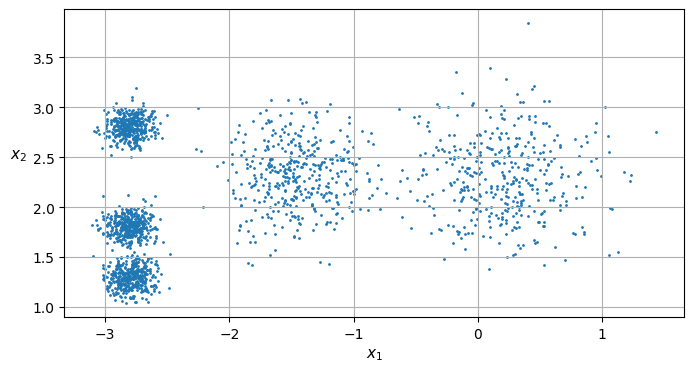

In [143]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=11)
    plt.ylabel("$x_2$", fontsize=11, rotation=0, labelpad=10)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.grid(True)
plt.show()

# K-Means clustering

In [139]:
k_max = 10
kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=42) for k in range(2, k_max+1)]

# Solihouette Diagram

In the diagrams,
* Height of each bar represents the number of instances in the cluster
* Width of each bar indicates the sorted silhouette coefficients of te instances in the cluster (wider is better)
The vertical dashed line in each subplot sows the silhouette score for that particular number of clusters. When most bars stop short of this dashed line, it means the clustering has a poor quality.

In [140]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter


def plot_silhouette_diagram(X:np.ndarray, model:KMeans, ax:plt.Axes):
    k = model.n_clusters
    y_pred = model.fit_predict(X)
    silhouette_coefficients = silhouette_samples(X, y_pred)

    y_lower = 10
    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter([str(i) for i in range(k)]))


    ax.axvline(x=silhouette_score(X, y_pred), color="red", linestyle="--")
    ax.set_title(f"$k={k}$")

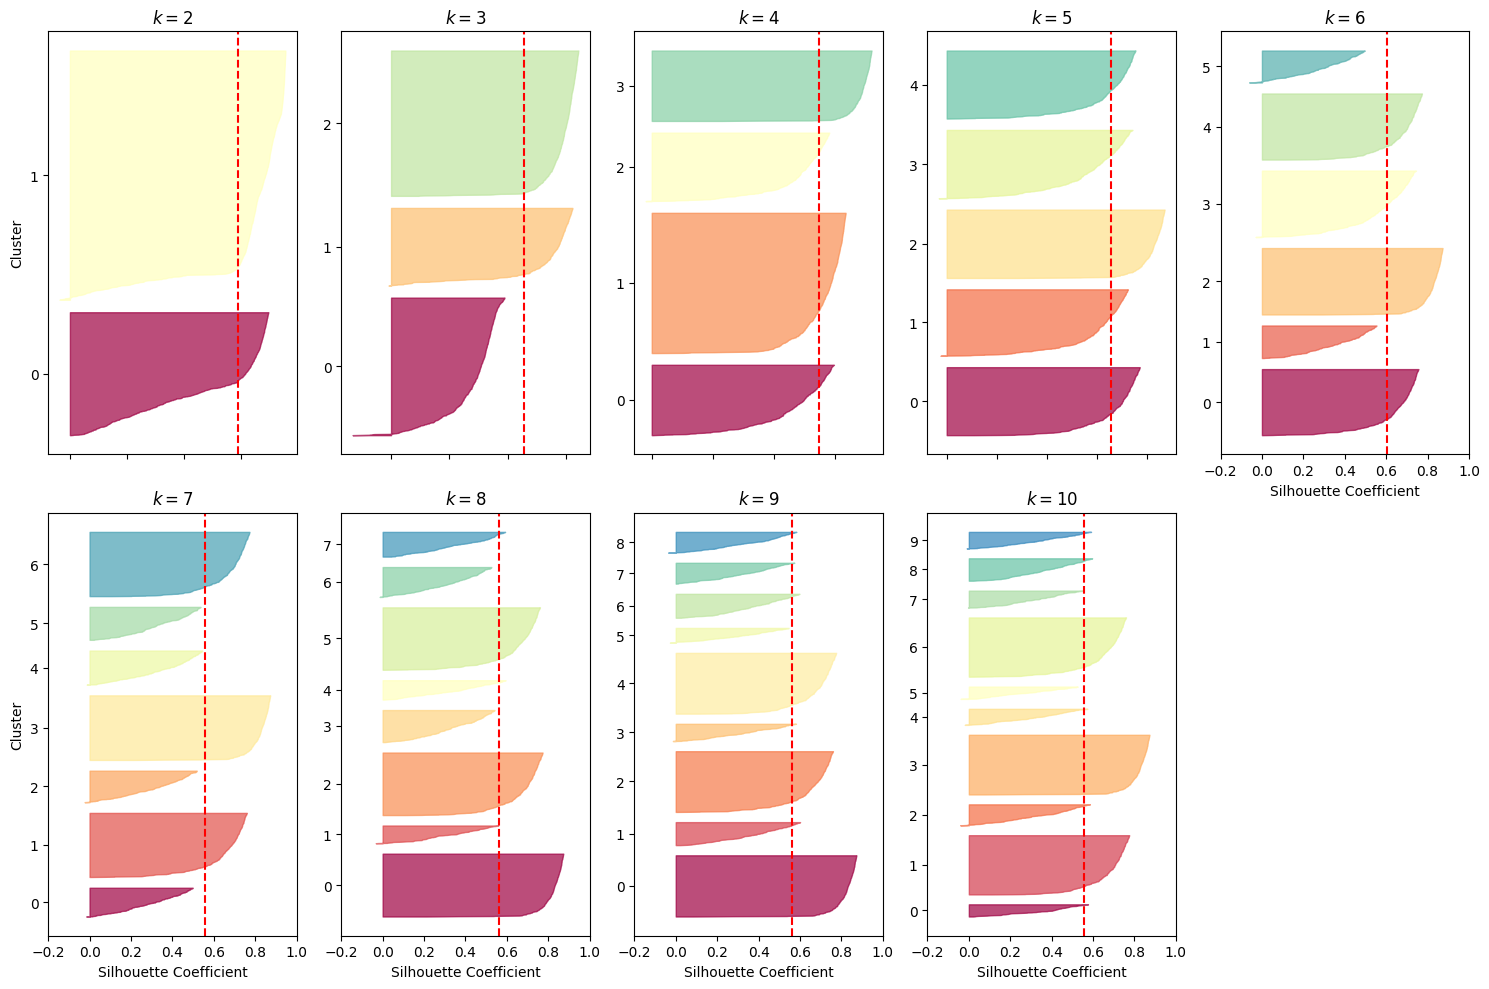

In [144]:
ncols = 5
nrows = ceil(k_max/ncols)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 5*nrows))
ax = ax.flatten()

ax_count = 0
for model in kmeans_models:
    plot_silhouette_diagram(X, model, ax[ax_count])

    if ax_count%ncols == 0: ax[ax_count].set_ylabel("Cluster")
    if ax_count//ncols == nrows-1 or ax_count+ncols > k_max-2:
        ax[ax_count].set_xlabel("Silhouette Coefficient")
        ax[ax_count].set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        ax[ax_count].tick_params(labelbottom=False)

    ax_count += 1

for i in range(ax_count, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

We know that the `make_bolbs` class creates five clusters with equal number of instances per cluster. So, it is expected to have bar with equal height. Although the over silhouette score for model with `k=4` is higher than the one `k=5`, since the bar width of the model with `k=5` have similar sizes, this model performs better.